https://stackoverflow.com/questions/43769068/jupyter-notebook-widget-javascript-not-detected

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [2]:
import sys
import os
import json
import argparse
import math
sys.path.append("../")
import logging
logger = logging.getLogger(__name__)

In [3]:
from dhira.data.dataset.cifiar10 import Cifiar10
from dhira.data.features.image_feature import ImageFeature
from dhira.tf.models.conv.convnet import Cifiar10ConvNet
from dhira.data.data_manager import DataManager

/home/mageswarand/anaconda3/envs/tensorflow1.0/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.21.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
cifiar = Cifiar10(download_path='../data/')

Resusing the file:  ../data//cifar-10-python.tar.gz



Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


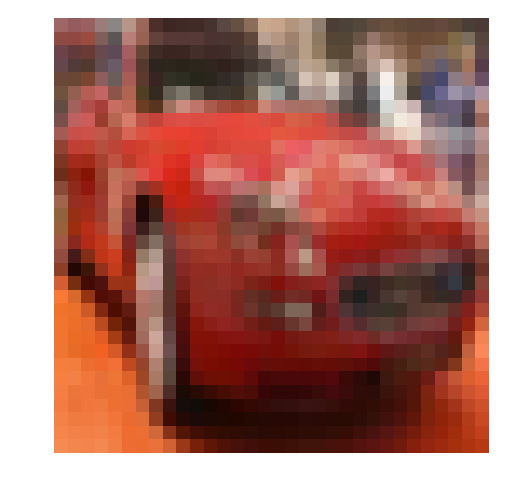

In [5]:
cifiar.display_stats(1,5)

In [6]:
data_manager = DataManager(cifiar)

In [7]:
get_train_data_gen, train_data_size = data_manager.get_train_data_from_file()
print('Training data size: ', train_data_size)

Training data size:  45000


In [8]:
get_val_data_gen, val_data_size = data_manager.get_validation_data_from_file()
print('Validation data size: ', val_data_size)

Validation data size:  5000


In [9]:
get_test_data_gen, test_data_size = data_manager.get_test_data_from_file()
print('Test data size: ', test_data_size)

Test data size:  10000


In [10]:
batch_size = 128
num_epochs = 1
num_train_steps_per_epoch = int(math.ceil(train_data_size / batch_size))
num_val_steps = int(math.ceil(val_data_size / batch_size))
log_period = 100
val_period = 100
save_period = 200
patience = 1


In [11]:

model = Cifiar10ConvNet(name='Cifiar10ConvNet', mode='train', save_dir='../models/', log_dir='../logs/', run_id='0',
                 image_shape=[32,32,3], keep_prop_value=0.5)


INFO:dhira.tf.models.base_tf_model:Writing logs to ../logs/Cifiar10ConvNet/00


In [12]:
model.build_graph()

INFO:dhira.tf.models.base_tf_model:Writing params to ../logs/Cifiar10ConvNet/00/trainparams.json
INFO:dhira.tf.models.base_tf_model:Building graph...
INFO:dhira.tf.models.conv.convnet:x: (?, 32, 32, 3)
INFO:dhira.tf.models.conv.convnet:Creating conv2d_maxpool layer
INFO:dhira.tf.models.conv.convnet:   ---> conv layer: (?, 32, 32, 16)
INFO:dhira.tf.models.conv.convnet:   ---> relu layer: (?, 32, 32, 16)
INFO:dhira.tf.models.conv.convnet:   ---> max pool layer: (?, 16, 16, 16)
INFO:dhira.tf.models.conv.convnet:conv1 layer: (?, 16, 16, 16)
INFO:dhira.tf.models.conv.convnet:conv1_dropout layer: (?, 16, 16, 16)
INFO:dhira.tf.models.conv.convnet:Creating conv2d_maxpool layer
INFO:dhira.tf.models.conv.convnet:   ---> conv layer: (?, 16, 16, 32)
INFO:dhira.tf.models.conv.convnet:   ---> relu layer: (?, 16, 16, 32)
INFO:dhira.tf.models.conv.convnet:   ---> max pool layer: (?, 8, 8, 32)
INFO:dhira.tf.models.conv.convnet:conv2 layer: (?, 8, 8, 32)
INFO:dhira.tf.models.conv.convnet:flatten layer: 

In [13]:
model.train(get_train_instance_generator=get_train_data_gen,
                get_val_instance_generator=get_val_data_gen,
                batch_size=batch_size,
                num_train_steps_per_epoch=num_train_steps_per_epoch,
                num_epochs=num_epochs,
                num_val_steps=num_val_steps,
                log_period=log_period,
                val_period=val_period,
                save_period=save_period,
                patience=patience)

Writing to /opt/dhira/logs/Cifiar10ConvNet/00

--------------------------------------------------

tensorboard --logdir  /opt/dhira/logs/Cifiar10ConvNet/00

tensorboard --logdir  /opt/dhira/logs/Cifiar10ConvNet/00/checkpoints --port 6007
--------------------------------------------------


INFO:dhira.tf.models.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-200


INFO:dhira.tf.models.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-352


INFO:dhira.tf.models.base_tf_model:Finished 1 epochs!


In [15]:
single_image = DataManager.get_random_feature(get_test_data_gen, test_data_size)

In [16]:
pred = model.predict_on_single_feature(single_image, '/opt/dhira/models/Cifiar10ConvNet/00/')

INFO:dhira.tf.models.base_tf_model:Getting latest checkpoint in /opt/dhira/models/Cifiar10ConvNet/00/
INFO:dhira.tf.models.base_tf_model:Attempting to load checkpoint at /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-352


INFO:tensorflow:Restoring parameters from /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-352


INFO:tensorflow:Restoring parameters from /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-352
INFO:dhira.tf.models.base_tf_model:Successfully loaded /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-352!


In [17]:
pred

array([[-1.00166667, -0.73909521, -0.60139811,  0.48190701,  0.20197153,
         0.08153173,  1.2087394 ,  0.20188269, -0.19859028,  0.30895245]], dtype=float32)

In [ ]:
# cifiar.display_image_predictions(single_image[0][0], pred, single_image[1][0])